In [1]:
#!pip install Keras

In [2]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
## Initialising the CNN
classifier = Sequential()

In [4]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))



In [5]:
## Flattening
classifier.add(Flatten())

In [6]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 128, activation = 'relu'))


In [7]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory(r'C:\Users\Administrator\Desktop\2-keras-cnn-catdog\dataset\training_set',
                                               target_size=(64, 64),
                                               batch_size=10,
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [12]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [14]:
## Importng test data
test_set = test_datagen.flow_from_directory(r'C:\Users\Administrator\Desktop\2-keras-cnn-catdog\dataset\test_set',
                                            target_size=(64, 64),
                                            batch_size=10,
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [15]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)         

In [25]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=20,
        validation_data=test_set,
        validation_steps=50)

Epoch 1/20
50/50 [==============================] - 22s 435ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 4.1477 - val_acc: 0.5231
Epoch 2/20
50/50 [==============================] - 24s 472ms/step - loss: 0.0247 - acc: 0.9880 - val_loss: 3.8223 - val_acc: 0.5802
Epoch 3/20
50/50 [==============================] - 18s 357ms/step - loss: 0.0436 - acc: 0.9820 - val_loss: 3.5562 - val_acc: 0.5546
Epoch 4/20
50/50 [==============================] - 16s 329ms/step - loss: 0.0649 - acc: 0.9775 - val_loss: 3.0960 - val_acc: 0.5759
Epoch 5/20
50/50 [==============================] - 16s 325ms/step - loss: 0.0344 - acc: 0.9915 - val_loss: 3.0128 - val_acc: 0.6849
Epoch 6/20
50/50 [==============================] - 16s 317ms/step - loss: 0.0838 - acc: 0.9720 - val_loss: 2.4726 - val_acc: 0.5759
Epoch 7/20
50/50 [==============================] - 16s 316ms/step - loss: 0.0187 - acc: 0.9895 - val_loss: 3.1337 - val_acc: 0.5798
Epoch 8/20
50/50 [==============================] - 16s 317ms/step - 

In [17]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'C:\Users\Administrator\Desktop\2-keras-cnn-catdog\dataset\single_prediction\dog1.jpg',
                           target_size =(64,64))


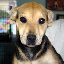

In [18]:
test_image

In [19]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [20]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,64,64,3)

In [21]:
result = classifier.predict(test_image)

In [22]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [23]:
prediction

'dog'

# Saving Weigths

In [24]:
model_json = classifier.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
#serialize weights to
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
